#SELECCION Y ETIQUETADO DE LA DATA

In [509]:
import pandas as pd

In [510]:
data=pd.read_csv('hashflow.csv' , delimiter = ';')
data['circulating-supply'] = data['marketCap']/data['close']
data['timeOpen'] = pd.to_datetime(data['timeOpen'])
data['timeHigh'] = pd.to_datetime(data['timeHigh'])
data['timeLow'] = pd.to_datetime(data['timeLow'])

In [511]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   timeOpen            582 non-null    datetime64[ns, UTC]
 1   timeHigh            582 non-null    datetime64[ns, UTC]
 2   timeLow             582 non-null    datetime64[ns, UTC]
 3   name                582 non-null    object             
 4   open                582 non-null    float64            
 5   high                582 non-null    float64            
 6   low                 582 non-null    float64            
 7   close               582 non-null    float64            
 8   volume              582 non-null    float64            
 9   marketCap           582 non-null    float64            
 10  circulating-supply  582 non-null    float64            
dtypes: datetime64[ns, UTC](3), float64(7), object(1)
memory usage: 50.1+ KB


In [512]:
import numpy as np
umbral_capitalizacion = 100000000  # $100 millones
data['marketCap_state'] = data['marketCap'].apply(lambda x: 1 if x >= umbral_capitalizacion else 0)

# Calcular los retornos logarítmicos y la volatilidad diaria
data['volatility'] = data['close'].pct_change().rolling(window=2, min_periods=1).std()
# Determinar si la volatilidad está por encima del percentil 90
data['high_volatility'] = np.where(data['volatility'] > data['volatility'].quantile(0.90), 1, 0)

# Calcular el umbral absoluto del aumento del suministro
umbral_aumento_suministro = 0.05 * data['circulating-supply'][0]  # 5% del suministro inicial
# Determinar si el aumento del suministro supera el umbral
data['supply_increase'] = (data['circulating-supply'].diff() > umbral_aumento_suministro).astype(int)

In [513]:
data = data.iloc[2:].reset_index(drop=True)

In [514]:
data

,timeOpen,timeHigh,timeLow,name,open,high,low,close,volume,marketCap,circulating-supply,marketCap_state,volatility,high_volatility,supply_increase
0,2024-06-08 00:00:00+00:00,2024-06-08 02:01:00+00:00,2024-06-08 22:30:00+00:00,Hashflow,0.282927,0.283863,0.264274,0.266147,6.889067e+06,1.083665e+08,4.071674e+08,1,0.025928,0,0
1,2024-06-07 00:00:00+00:00,2024-06-07 05:10:00+00:00,2024-06-07 18:16:00+00:00,Hashflow,0.311247,0.313510,0.264227,0.282938,9.976977e+06,1.151980e+08,4.071496e+08,1,0.056856,0,0
2,2024-06-06 00:00:00+00:00,2024-06-06 12:13:00+00:00,2024-06-06 20:04:00+00:00,Hashflow,0.314513,0.323548,0.306642,0.311249,8.077500e+06,1.267142e+08,4.071157e+08,1,0.026145,0,0
3,2024-06-05 00:00:00+00:00,2024-06-05 01:44:00+00:00,2024-06-05 14:20:00+00:00,Hashflow,0.313665,0.317499,0.307661,0.314513,7.266545e+06,1.279267e+08,4.067458e+08,1,0.063339,0,0
4,2024-06-04 00:00:00+00:00,2024-06-04 16:11:00+00:00,2024-06-04 13:02:00+00:00,Hashflow,0.299259,0.316408,0.297935,0.313665,1.092454e+07,1.275496e+08,4.066425e+08,1,0.009320,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,2022-11-11 00:00:00+00:00,2022-11-11 01:29:00+00:00,2022-11-11 14:32:00+00:00,Hashflow,0.662034,0.682993,0.567872,0.601299,7.047958e+07,1.053652e+08,1.752292e+08,1,0.130587,1,0
576,2022-11-10 00:00:00+00:00,2022-11-10 15:54:00+00:00,2022-11-10 10:55:00+00:00,Hashflow,0.586871,0.745413,0.569016,0.662154,1.277488e+08,1.160288e+08,1.752292e+08,1,0.021410,0,0
577,2022-11-09 00:00:00+00:00,2022-11-09 02:32:00+00:00,2022-11-09 21:32:00+00:00,Hashflow,0.636419,0.671639,0.524610,0.586944,1.090827e+08,1.028497e+08,1.752292e+08,1,0.151880,1,0
578,2022-11-08 00:00:00+00:00,2022-11-08 00:50:00+00:00,2022-11-08 23:41:00+00:00,Hashflow,1.022225,1.149525,0.617142,0.636757,2.956607e+08,1.115784e+08,1.752292e+08,1,0.140327,1,0


In [515]:
# Definir la función para etiquetar las predicciones
def etiquetar_prediccion(row):
    if row['marketCap_state'] == 1 and row['high_volatility'] == 0 and (row['supply_increase'] == 0 or pd.isna(row['supply_increase'])):
        return 0  # Aumento en el precio
    elif row['marketCap_state'] == 0 and row['high_volatility'] == 1 and (row['supply_increase'] == 1 or pd.isna(row['supply_increase'])):
        return 1  # Disminución en el precio
    elif row['marketCap_state'] == 1 and row['high_volatility'] == 0 and (row['supply_increase'] == 1 or pd.isna(row['supply_increase'])):
        return 2  # Precio estable
    else:
        return 1

# Aplicar la función para etiquetar las predicciones
data['tags'] = data.apply(etiquetar_prediccion, axis=1)


In [516]:
data

,timeOpen,timeHigh,timeLow,name,open,high,low,close,volume,marketCap,circulating-supply,marketCap_state,volatility,high_volatility,supply_increase,tags
0,2024-06-08 00:00:00+00:00,2024-06-08 02:01:00+00:00,2024-06-08 22:30:00+00:00,Hashflow,0.282927,0.283863,0.264274,0.266147,6.889067e+06,1.083665e+08,4.071674e+08,1,0.025928,0,0,0
1,2024-06-07 00:00:00+00:00,2024-06-07 05:10:00+00:00,2024-06-07 18:16:00+00:00,Hashflow,0.311247,0.313510,0.264227,0.282938,9.976977e+06,1.151980e+08,4.071496e+08,1,0.056856,0,0,0
2,2024-06-06 00:00:00+00:00,2024-06-06 12:13:00+00:00,2024-06-06 20:04:00+00:00,Hashflow,0.314513,0.323548,0.306642,0.311249,8.077500e+06,1.267142e+08,4.071157e+08,1,0.026145,0,0,0
3,2024-06-05 00:00:00+00:00,2024-06-05 01:44:00+00:00,2024-06-05 14:20:00+00:00,Hashflow,0.313665,0.317499,0.307661,0.314513,7.266545e+06,1.279267e+08,4.067458e+08,1,0.063339,0,0,0
4,2024-06-04 00:00:00+00:00,2024-06-04 16:11:00+00:00,2024-06-04 13:02:00+00:00,Hashflow,0.299259,0.316408,0.297935,0.313665,1.092454e+07,1.275496e+08,4.066425e+08,1,0.009320,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,2022-11-11 00:00:00+00:00,2022-11-11 01:29:00+00:00,2022-11-11 14:32:00+00:00,Hashflow,0.662034,0.682993,0.567872,0.601299,7.047958e+07,1.053652e+08,1.752292e+08,1,0.130587,1,0,1
576,2022-11-10 00:00:00+00:00,2022-11-10 15:54:00+00:00,2022-11-10 10:55:00+00:00,Hashflow,0.586871,0.745413,0.569016,0.662154,1.277488e+08,1.160288e+08,1.752292e+08,1,0.021410,0,0,0
577,2022-11-09 00:00:00+00:00,2022-11-09 02:32:00+00:00,2022-11-09 21:32:00+00:00,Hashflow,0.636419,0.671639,0.524610,0.586944,1.090827e+08,1.028497e+08,1.752292e+08,1,0.151880,1,0,1
578,2022-11-08 00:00:00+00:00,2022-11-08 00:50:00+00:00,2022-11-08 23:41:00+00:00,Hashflow,1.022225,1.149525,0.617142,0.636757,2.956607e+08,1.115784e+08,1.752292e+08,1,0.140327,1,0,1


In [517]:
# Guardar los datos etiquetados
data.to_csv('datos_etiquetados_hashflow.csv', index=False)

#ENTRENAMIENTO

In [518]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Eliminar filas con valores NaN en la columna 'tags'
data_clean = data.dropna(subset=['tags'])

# Separar características (X) y etiquetas (y)
X = data_clean[['marketCap_state', 'high_volatility', 'supply_increase']]
y = data_clean['tags']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba con Random Forest
y_pred_rf = rf_model.predict(X_test)

# Evaluar el modelo Random Forest
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Inicializar y entrenar el modelo Gradient Boosting
gbm_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbm_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba con Gradient Boosting
y_pred_gbm = gbm_model.predict(X_test)

# Evaluar el modelo Gradient Boosting
print("\nGradient Boosting Machine:")
print(classification_report(y_test, y_pred_gbm))


Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        66

    accuracy                           1.00       116
   macro avg       1.00      1.00      1.00       116
weighted avg       1.00      1.00      1.00       116


Gradient Boosting Machine:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        66

    accuracy                           1.00       116
   macro avg       1.00      1.00      1.00       116
weighted avg       1.00      1.00      1.00       116



#EVALUACION

In [519]:
import pandas as pd
import numpy as np

# Generar datos de prueba
num_samples = 580


# Etiquetas
test_marketCap_state = np.random.randint(0, 2, num_samples)  # 0 o 1 para el estado de capitalización de mercado
test_high_volatility = np.random.randint(0, 2, num_samples)  # 0 o 1 para alta volatilidad
test_supply_increase = np.random.randint(0, 2, num_samples)  # 0 o 1 para el aumento del suministro

# Crear el DataFrame de datos de prueba
test_data = pd.DataFrame({
    'marketCap_state': test_marketCap_state,
    'high_volatility': test_high_volatility,
    'supply_increase': test_supply_increase,

})

# Mostrar los primeros cinco registros del DataFrame de datos de prueba
print("Datos de prueba generados:")
print(test_data.head())


Datos de prueba generados:
   marketCap_state  high_volatility  supply_increase
0                0                1                0
1                1                0                1
2                1                1                0
3                0                1                1
4                1                0                1


In [520]:
# Predicciones con el modelo Random Forest
predicciones_rf_test = rf_model.predict(test_data)

# Predicciones con el modelo Gradient Boosting
predicciones_gbm_test = gbm_model.predict(test_data)

# Imprimir las predicciones
print("Predicciones Random Forest en datos de prueba:", predicciones_rf_test)
print("\nPredicciones Gradient Boosting en datos de prueba:", predicciones_gbm_test)


Predicciones Random Forest en datos de prueba: [1 0 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1
 0 0 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0
 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1
 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1
 0 1 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 0
 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1
 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1
 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 

In [521]:
from sklearn.metrics import accuracy_score


In [522]:
# Etiquetar los datos originales con las mismas condiciones que usaste para etiquetar el conjunto de entrenamiento
y_true = data.apply(etiquetar_prediccion, axis=1)

# Mostrar las primeras cinco etiquetas verdaderas
print("Etiquetas verdaderas:")
print(y_true.head())

Etiquetas verdaderas:
0    0
1    0
2    0
3    0
4    0
dtype: int64


In [523]:
test_data.shape

(580, 3)

In [524]:
y_true.shape

(580,)

In [525]:
# Calcular la precisión del modelo Random Forest en los datos de prueba
accuracy_rf = accuracy_score(y_true, predicciones_rf_test)
print("Precisión del modelo Random Forest en datos de prueba:", accuracy_rf)

# Calcular la precisión del modelo Gradient Boosting en los datos de prueba
accuracy_gbm = accuracy_score(y_true, predicciones_gbm_test)
print("Precisión del modelo Gradient Boosting en datos de prueba:", accuracy_gbm)


Precisión del modelo Random Forest en datos de prueba: 0.5844827586206897
Precisión del modelo Gradient Boosting en datos de prueba: 0.5844827586206897


In [526]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


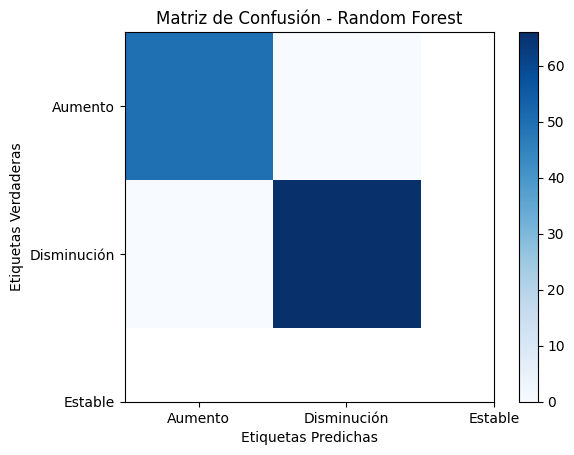

In [527]:
# Matriz de Confusión para el modelo Random Forest
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.imshow(confusion_matrix_rf, cmap=plt.cm.Blues, interpolation='nearest')
plt.title('Matriz de Confusión - Random Forest')
plt.colorbar()
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')
plt.xticks([0, 1, 2], ['Aumento', 'Disminución', 'Estable'])
plt.yticks([0, 1, 2], ['Aumento', 'Disminución', 'Estable'])
plt.show()


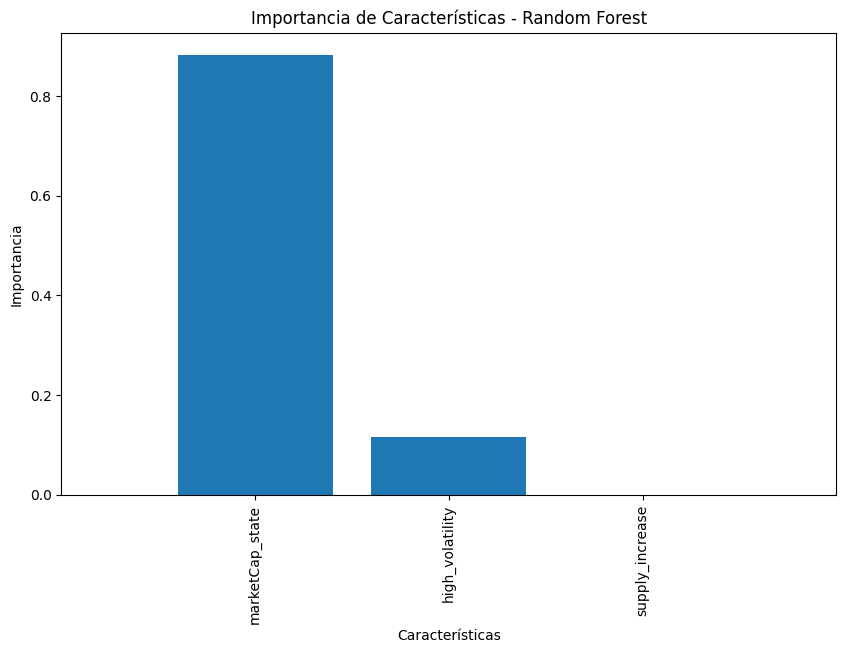

In [528]:
# Obtener la importancia de las características del modelo Random Forest
importances = rf_model.feature_importances_

# Obtener nombres de las características
feature_names = X.columns

# Ordenar las importancias de las características en orden descendente
indices = np.argsort(importances)[::-1]

# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
plt.title("Importancia de Características - Random Forest")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.show()


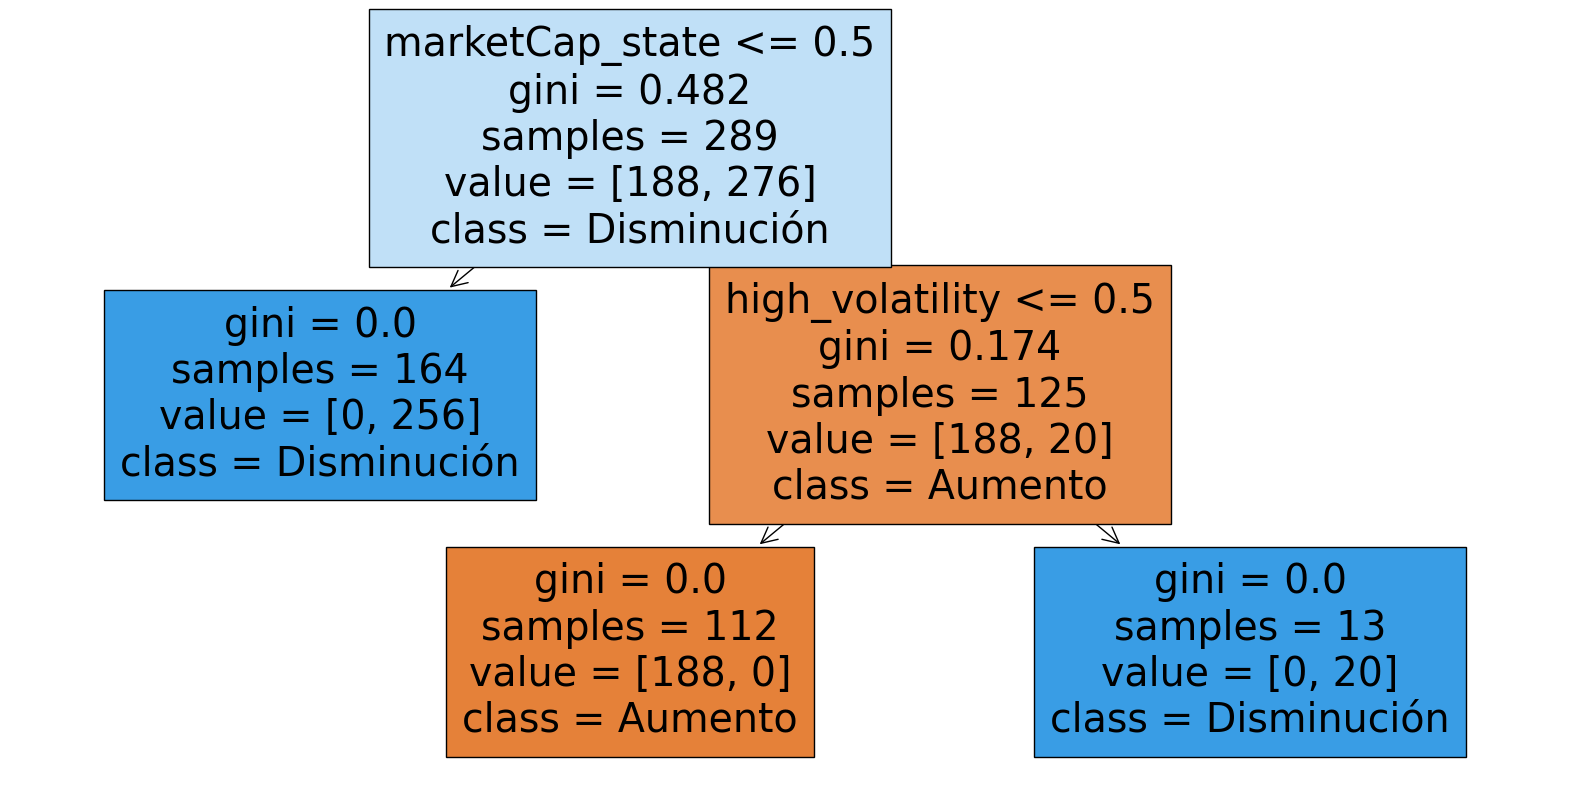

In [529]:
from sklearn.tree import plot_tree

# Obtener un árbol de decisión del modelo Random Forest (o Gradient Boosting)
tree = rf_model.estimators_[0]  # Cambia 0 por el índice del árbol a visualizar

# Graficar el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=X.columns, class_names=['Aumento', 'Disminución', 'Estable'], filled=True)
plt.show()
